In [1]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
grey = pd.read_csv("the_picture_of_dorian_grey.csv", delimiter='|', on_bad_lines='skip')
grey.columns= ['tweet']
grey

,tweet
0,"0,""RT @fireplacewitch: i want new moots! im co..."
1,;;
2,"so yeah follow me…"";;"
3,"1,""RT @fireplacewitch: i want new moots! im co..."
4,;;
...,...
1402,"748,""so my copy of the picture of Dorian Gray ..."
1403,"749,""RT @BooksStoryline: Ten great lines from ..."
1404,"750,crush just called the picture of dorian gr..."
1405,"751,@Chris86767838 She looks like the picture ..."


In [3]:
#nettoyage des données (utilisation de la librairie regex)
grey['tweet'] = grey['tweet'].str.replace(r"[A-Za-z.][0-9]+[A-Za-z%°.]", " ")
grey['tweet'] = grey['tweet'].str.replace(r"(\s-\s|-$)", " ")
grey['tweet'] = grey['tweet'].str.replace(r"[,!?%()/]", " ")
grey['tweet'] = grey['tweet'].str.replace(r"&\S*\s", " ")
grey['tweet'] = grey['tweet'].str.replace(r"&", " ")
grey['tweet'] = grey['tweet'].str.replace(r"+", " ")
grey['tweet'] = grey['tweet'].str.replace(r"#", " ")
grey['tweet'] = grey['tweet'].str.replace(r"$", " ")
grey['tweet'] = grey['tweet'].str.replace(r"£", " ")
grey['tweet'] = grey['tweet'].str.replace(r"%", " ")                                                  
grey['tweet'] = grey['tweet'].str.replace(r"@", " ")
grey['tweet'] = grey['tweet'].str.replace(r"-", " ")
grey['tweet'] = grey['tweet'].str.replace(r";", " ")

grey

,tweet
0,"0 ""RT fireplacewitch: i want new moots im co..."
1,
2,"so yeah follow me…"""
3,"1 ""RT fireplacewitch: i want new moots im co..."
4,
...,...
1402,"748 ""so my copy of the picture of Dorian Gray ..."
1403,"749 ""RT BooksStoryline: Ten great lines from ..."
1404,750 crush just called the picture of dorian gr...
1405,751 Chris86767838 She looks like the picture ...


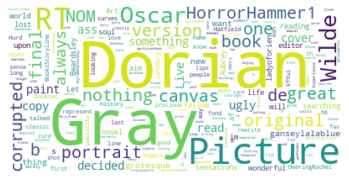

In [4]:
text = " ".join(i for i in grey['tweet'])
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors","https","t","co"])

# Generate a word cloud image
wordcloud = WordCloud(collocations = False, stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
!pip install nltk

In [5]:
def get_ngrams(text, ngram_from=2, ngram_to=2, n=None, max_features=20000):
    
    vec = CountVectorizer(ngram_range = (ngram_from, ngram_to), 
                          max_features = max_features, 
                          stop_words='english').fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, i]) for word, i in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
   
    return words_freq[:n]

In [6]:
bigrams = get_ngrams(grey['tweet'], ngram_from=2, ngram_to=2,n=6)
bigrams_df = pd.DataFrame(bigrams)
bigrams_df.columns=["Bigram", "Frequency"]
bigrams_df.head()

,Bigram,Frequency
0,dorian gray,696
1,picture dorian,591
2,oscar wilde,185
3,gray 1945,115
4,gray portrait,90


In [7]:
trigrams = get_ngrams(grey['tweet'], ngram_from=3, ngram_to=3, n=15)
trigrams_df = pd.DataFrame(trigrams)
trigrams_df.columns=["Trigram", "Frequency"]
trigrams_df.head()

,Trigram,Frequency
0,picture dorian gray,591
1,dorian gray 1945,115
2,dorian gray portrait,90
3,gray 1945 original,89
4,1945 original canvas,89


In [13]:
!pip install textblob

In [8]:
from textblob import TextBlob

# Créez un objet TextBlob à partir du texte que vous souhaitez analyser
text = grey['tweet']
blob = TextBlob(str(text))

# Utilisez la méthode `sentiment` pour obtenir un score de polarité et de subjectivité
possitif = blob.sentiment.polarity
negatif = blob.sentiment.subjectivity

print(f"Possitif: {possitif}")
print(f"Négatif: {negatif}")

Possitif: 0.2681818181818182
Négatif: 0.4147727272727273
